In [1]:

import sys
sys.path.append('..')
from src.evo_eq_model_new import *

python(22195) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [2]:
8e-4*2/3 /52

1.0256410256410258e-05

In [3]:
import random
import numpy.random as rnd
import networkx as nx
from anytree import Node
from tqdm import tqdm
import numpy as np
import os
import sys


if(sys.version_info[1]<= 7):
    import pickle5 as pickle
else:
    import pickle
    
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl
from matplotlib.ticker import FuncFormatter
fmt = lambda x, pos: '{:.3f}'.format(x)
from numba import jit

#matplotlib.use('TkAgg')
from matplotlib.lines import Line2D
plt.rc('mathtext', default='regular')

sns.set(context='poster')
sns.set_style("white")
plt.rc('lines', linewidth=3.0)
plt.rcParams['xtick.labelsize']=30
plt.rcParams['ytick.labelsize']=30
plt.rcParams['axes.labelsize']=35
plt.rcParams['legend.fontsize']= 25
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['image.cmap']='coolwarm'
plt.rcParams['axes.titlesize'] = 40
plt.rcParams['figure.titlesize'] = 40

In [4]:
import pandas as pd
import scipy.interpolate as spi



In [5]:
@jit(nopython=True)    
def find_t_intersection(f,g, t):
    #print(np.sign(f - g))
    idx = np.argwhere(np.diff(np.sign(f - g))).flatten()
    #print(idx)
    if len(idx)>0:
        return t[idx[0]]
    else:
        return np.inf

@jit(nopython=True)    
def find_ind_intersection(f,g):
    #print(np.sign(f - g))
    idx = np.argwhere(np.diff(np.sign(f - g))).flatten()
    #print(idx)
    if len(idx)>0:
        return idx[0]
    else:
        return np.inf

In [6]:
from matplotlib.ticker import FuncFormatter

fmt = lambda x, pos: '{:.1f}'.format(x)


In [7]:
nb_name = os.path.basename(globals()['__vsc_ipynb_file__'])
nb_name= nb_name[:nb_name.find('.ipynb')]

# obsidian_vault_folder = os.path.expanduser("~")+'/Dropbox/Work_main/Obsidian/Project_tree/Project_Tree/'
# figures_folder = obsidian_vault_folder + '/figures/'+nb_name+'/'
# os.makedirs(figures_folder,exist_ok=True)

In [8]:
import cProfile

In [9]:
rnd.seed(101)
random.seed(101)

In [10]:
N = 1e7
R0=beta=3
mu= 1e-4
p_alpha = .1
kappa=0
xi = 50


In [11]:
mu

0.0001

In [12]:
home = os.path.expanduser("~")
project_path =  os.path.relpath("..")
if project_path not in sys.path:
    sys.path.append(project_path)

sys.path.insert(1, project_path)
output_folder= project_path+'/outputs/'

In [13]:
%load_ext autoreload

In [15]:
mu*N

1000.0

done


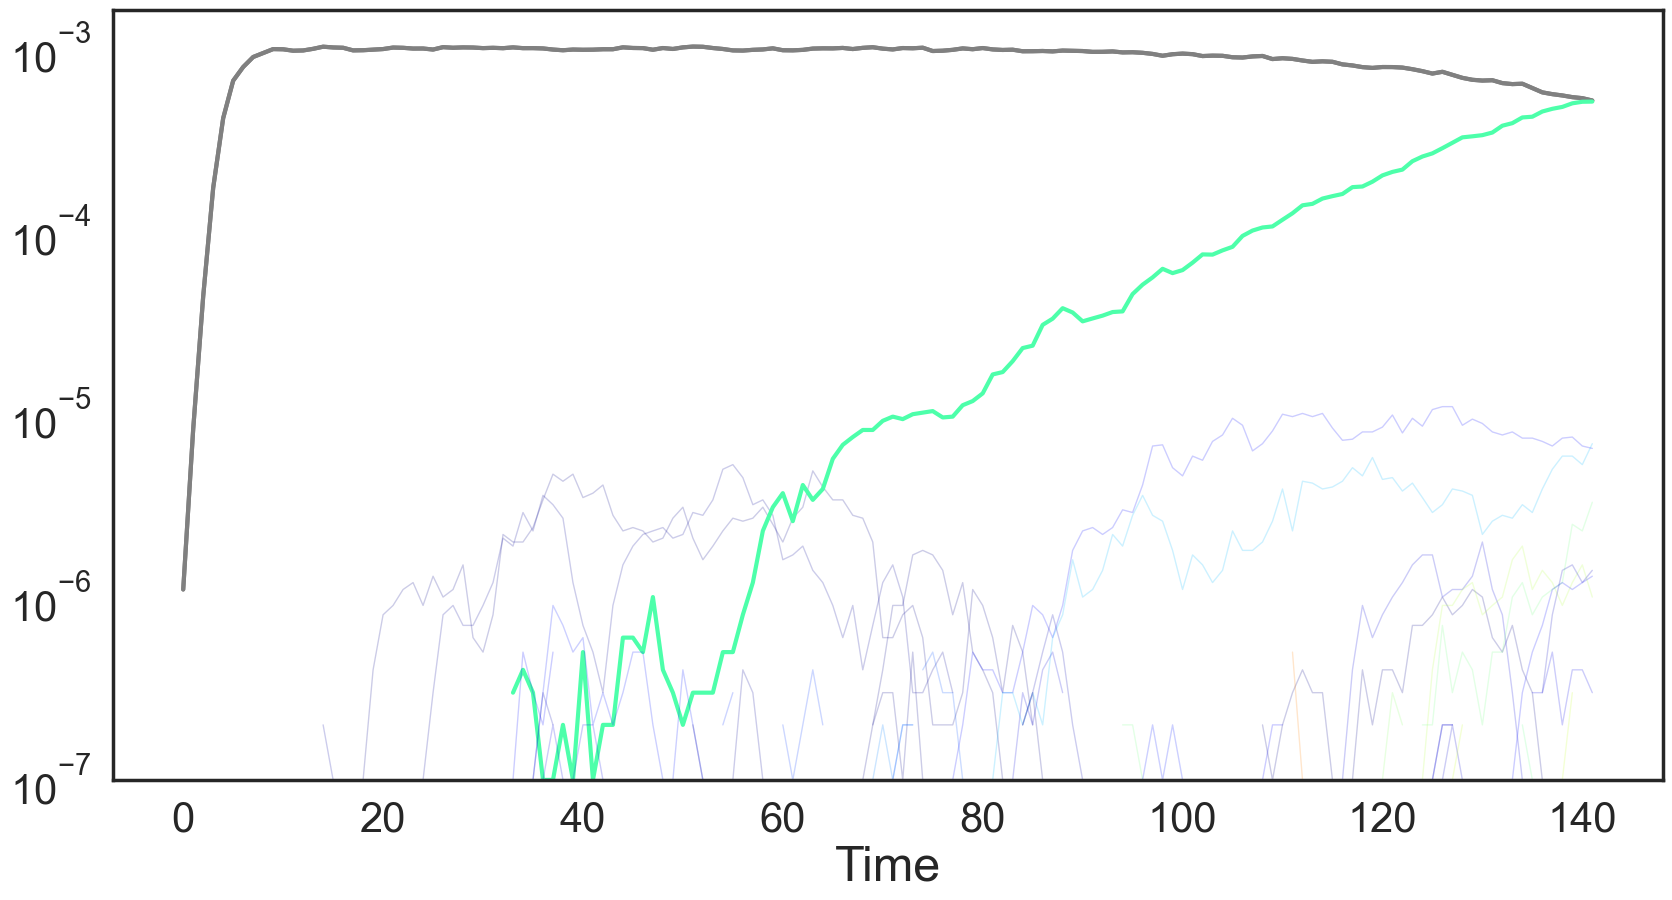

In [222]:
%autoreload
M_success = eqModel(N=N, infection_rate=beta, yc = 1e-3, recovery_rate=1, mutation_rate = mu, p_alpha= p_alpha,xi = xi, initial_infected=10,dt=.1, figures_folder= None, )
M_success.run_to_extinction()#(ignore_running= True,max_iter = 6000)
print('done')

%autoreload
ds = np.arange(0,20 + np.round(np.log(mu*N)/p_alpha))
color_ds= dict(zip(ds,plt.cm.jet(np.linspace(0,1,len(ds)))))

fig,ax =plt.subplots(1,1,figsize=(20,10),sharex=True)
ax = [ax]
plt.subplots_adjust(hspace=.1,wspace=.3)
y0p = (R0-1-np.log(R0))/R0

xinf = M_success.find_x_inf(R0,M_success.yc)
T = M_success.calc_T(R0,M_success.yc,N)
zinf = 1-xinf
ts_det = np.linspace(0,T,1000)

#get the three strains with the highest infected size
big_strains = sorted(M_success.strain_set, key=lambda x: x.recovered_size, reverse=True)[:5]
big_names=  [strain.name for strain in big_strains]

if True:
    ts_root= np.array(M_success.root_strain.times)
    I_root = np.array(M_success.root_strain.infected_history)
    S_root = np.array(M_success.root_strain.susceptible_history)
    R_root = np.array(M_success.root_strain.recovered_history)
    xparent = S_root/N
    zparent = R_root/N
    yparent = I_root/N
    t_peak = ts_root[np.argmax(I_root)]
    legend_ds = {}

for strain in M_success.strain_set:
    if strain.name==0:
        color='grey'
    else:
        color = color_ds[strain.distance_to_root]

    I_i = np.array(strain.infected_history)
    if len(I_i)==0:
        continue

    c= np.exp(-strain.distance_to_parent/xi)
    s_inf = R0*(1-xinf)*(1-c)
    

    chi_i = np.array(strain.frequency_history)
    s_i = np.array(strain.selection_history)
    ts_i = np.array(strain.times)
    d_pc = strain.distance_to_parent
    
    if strain.root_intersection_time<np.inf or strain.name==0:

        t_i0 = ts_i[0]
        chi_0 = chi_i[0]
        if t_i0<t_peak:
            t_i0 = t_peak

            # ax[0].axvline(ts_i[np.argmin(np.abs(ts_i-t_peak))],color=color,ls='--')

        alpha= 1
        lw= 3


    else: 
        alpha = .2
        lw= 1
        # if np.max(strain.infected_history)>100/np.max(strain.fitness_history):
        if np.max(strain.frequency_history)>3e-2:
            alpha = 1
            lw= 3
    if strain.name ==0:
        ax[0].plot(ts_i[chi_i>0],I_i[chi_i>0]/N,color=color, alpha= alpha, lw = lw)
    ax[0].plot(ts_i[chi_i>0],I_i[chi_i>0]/N,color=color, alpha= alpha, lw = lw)
    #ax[1].plot(ts_i,s_i ,color=color, alpha= alpha, lw = lw)    


for a in ax:
    a.set_xlabel('Time')
    
ax[0].set_yscale('log')


approx_handles = [mpl.lines.Line2D([0], [0], color='grey', lw=3, linestyle='--'), mpl.lines.Line2D([0], [0], color='grey', lw=3, linestyle='-.')]
approx_labels = [r'$\left(1-c(d)\right) z(t)$',r'$\left(1-c(d)\right) \frac{z(t)}{1-z(t)}$']

ax[0].set_ylim(bottom=1/N)
cmap = plt.cm.jet  # define the colormap
cmaplist = [cmap(i) for i in range(cmap.N)]
cmaplist[0] = (.5, .5, .5, 1.0)
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
bounds = ds*p_alpha

In [ ]:
def plot_strain_dynamics(M):
    """
    Plot the dynamics of strains in the model.
    
    Parameters:
    -----------
    M : eqModel object
        The model containing simulation results
    """
    # Extract parameters from M
    N = M.N
    R0 = M.infection_rate
    mu = M.mutation_rate
    p_alpha = M.p_alpha
    xi = M.xi
    
    # Create colormap for strains
    ds = np.arange(0, 20 + np.round(np.log(mu*N)/p_alpha))
    color_ds = dict(zip(ds, plt.cm.jet(np.linspace(0,1,len(ds)))))
    
    # Create figure and axes
    fig, ax = plt.subplots(1, 1, figsize=(20, 10), sharex=True)
    ax = [ax]
    plt.subplots_adjust(hspace=.1, wspace=.3)
    
    # Calculate model parameters
    y0p = (R0-1-np.log(R0))/R0
    xinf = M.find_x_inf(R0, M.yc)
    T = M.calc_T(R0, M.yc, N)
    zinf = 1-xinf
    ts_det = np.linspace(0, T, 1000)
    
    # Get the strains with the highest infected size
    big_strains = sorted(M.strain_set, key=lambda x: x.recovered_size, reverse=True)[:5]
    big_names = [strain.name for strain in big_strains]
    
    # Process root strain data
    ts_root = np.array(M.root_strain.times)
    I_root = np.array(M.root_strain.infected_history)
    S_root = np.array(M.root_strain.susceptible_history)
    R_root = np.array(M.root_strain.recovered_history)
    xparent = S_root/N
    zparent = R_root/N
    yparent = I_root/N
    t_peak = ts_root[np.argmax(I_root)]
    legend_ds = {}
    
    # Plot each strain's dynamics
    for strain in M.strain_set:
        if strain.name == 0:
            color = 'grey'
        else:
            color = color_ds[strain.distance_to_root]
            
        I_i = np.array(strain.infected_history)
        if len(I_i) == 0:
            continue
            
        c = np.exp(-strain.distance_to_parent/xi)
        s_inf = R0*(1-xinf)*(1-c)
        
        chi_i = np.array(strain.frequency_history)
        s_i = np.array(strain.selection_history)
        ts_i = np.array(strain.times)
        d_pc = strain.distance_to_parent
        
        if strain.root_intersection_time < np.inf or strain.name == 0:
            t_i0 = ts_i[0]
            chi_0 = chi_i[0]
            if t_i0 < t_peak:
                t_i0 = t_peak
                
            alpha = 1
            lw = 3
        else:
            alpha = .2
            lw = 1
            if np.max(strain.frequency_history) > 3e-2:
                alpha = 1
                lw = 3
                
        if strain.name == 0:
            ax[0].plot(ts_i[chi_i>0], I_i[chi_i>0]/N, color=color, alpha=alpha, lw=lw)
        ax[0].plot(ts_i[chi_i>0], I_i[chi_i>0]/N, color=color, alpha=alpha, lw=lw)
        
    # Set labels and scales
    for a in ax:
        a.set_xlabel('Time')
    ax[0].set_yscale('log')
    
    # Create legend
    approx_handles = [mpl.lines.Line2D([0], [0], color='grey', lw=3, linestyle='--'), 
                     mpl.lines.Line2D([0], [0], color='grey', lw=3, linestyle='-.')]
    approx_labels = [r'$\left(1-c(d)\right) z(t)$',r'$\left(1-c(d)\right) \frac{z(t)}{1-z(t)}$']
    
    ax[0].set_ylim(bottom=1/N)
    
    # Define colormap
    cmap = plt.cm.jet
    cmaplist = [cmap(i) for i in range(cmap.N)]
    cmaplist[0] = (.5, .5, .5, 1.0)
    cmap = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N)
    bounds = ds*p_alpha
    
    return fig, ax

[1.9934106095008297,
 1.9509826666165302,
 1.7566858516554191,
 1.2284310299559893,
 0.6371302651610351,
 0.28527372765245196,
 0.1605798436775978,
 0.07244420233300075,
 0.03819005554283028,
 0.005011420356278551,
 0.006622345332647939,
 0.0186051045092952,
 0.016464780946680246,
 0.0027278473906633405,
 -0.015152648208288433,
 -0.008869174202370211,
 -0.006123692295194161,
 0.015738121141008365,
 0.01429819492215767,
 0.008942980478607643,
 0.004114989500754618,
 -0.008452463902579033,
 -0.006431083036106844,
 -0.00033044999681342,
 -0.000527943043404977,
 0.007707235949540481,
 -0.012368649772416473,
 -0.007519331573085042,
 -0.01048941433007855,
 -0.008805538360410092,
 -0.003996683972056325,
 -0.006985398324298786,
 -0.0052963459724897355,
 -0.012009341136262841,
 -0.006598211800971865,
 -0.006592624622891896,
 -0.005683442040845144,
 0.00227756894672404,
 0.009102441078680856,
 0.004260391496819116,
 0.006829572079712909,
 0.006572157387171096,
 0.002938122810135946,
 0.003331914

0


(-0.1, 0.3)

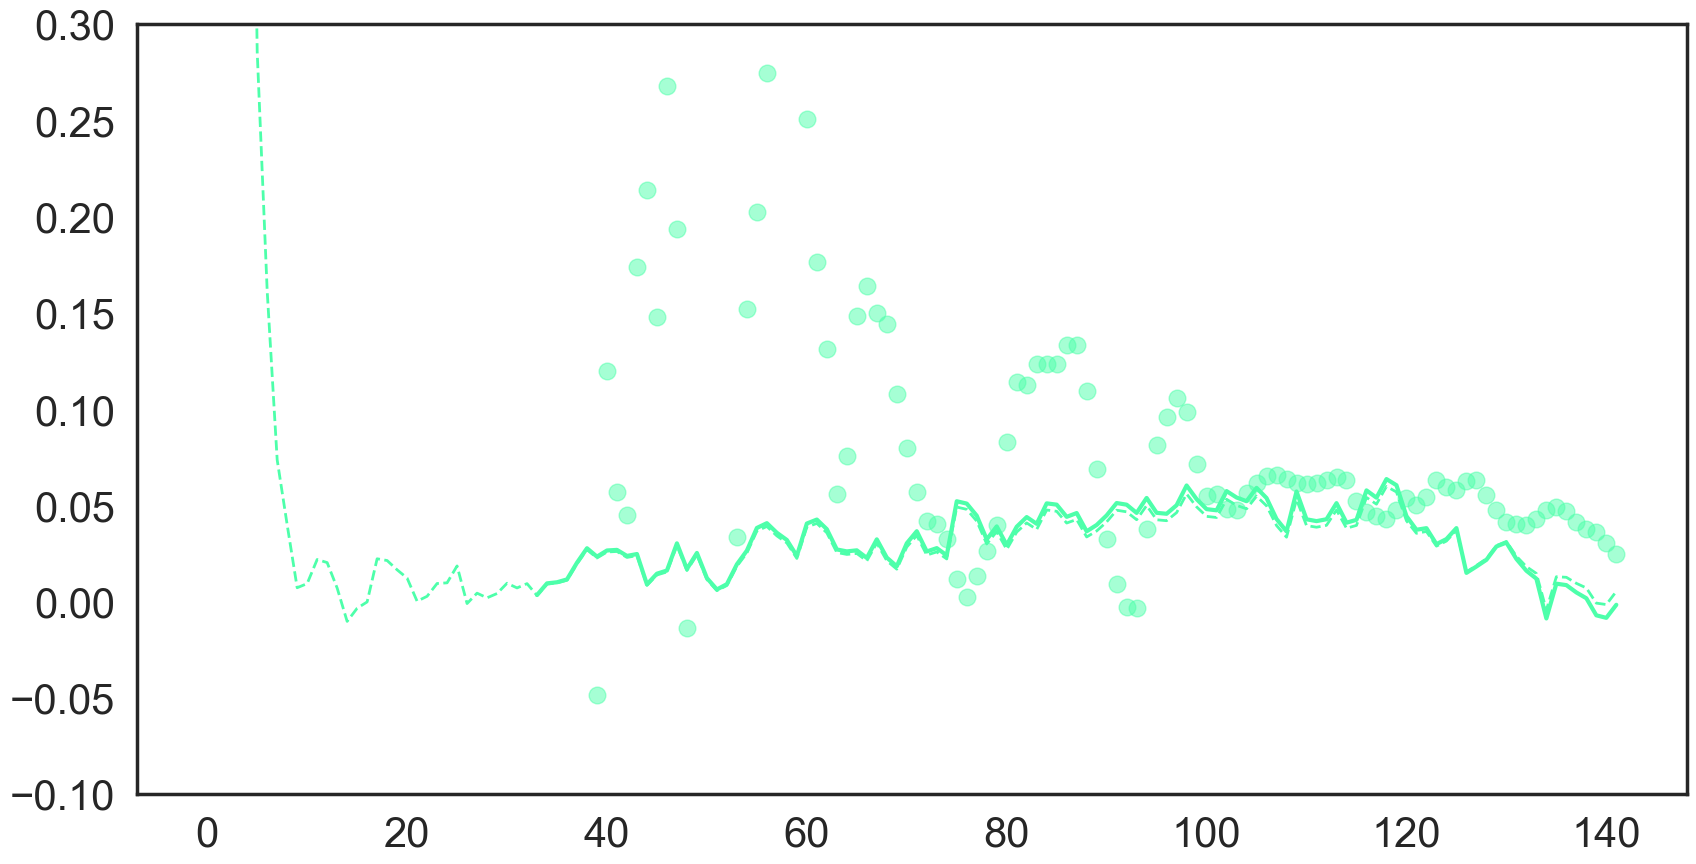

In [230]:
root = M_success.root_strain
fig,ax = plt.subplots(1, 1, figsize=(20, 10), sharex=True)
for x in M_success.strain_set:
    y = np.array(x.infected_history)/N
    try:
        if np.max(y)<1e-4:
            continue
    except:
        continue
    if x.name==0:
        continue
    else:
        color = color_ds[x.distance_to_parent]
    c = np.exp(-x.distance_to_parent/xi)
    ax.plot(x.times, x.fitness_history, color=color, alpha=1)
    
    ax.plot(root.times, root.fitness_history + (1-c)*np.array(root.recovered_history)/N, color=color,ls='--', lw=2)
    #gaussian smoothing
    logder = np.gradient(np.log(
        pd.Series(x.infected_history).rolling(5, win_type='gaussian').mean(std=5).values), x.times)
        
    ax.plot(x.times, logder, 'o',color=color, alpha=.5)
        
    print(x.parent.name)
    
# ax.plot(ts_root, M_success.yc * ts_root**(2/3), color='grey', lw=3, ls='--')
ax.set_ylim(-.1,.3)
# ax.set_xlim(0, 60)

0


(-0.1, 0.6)

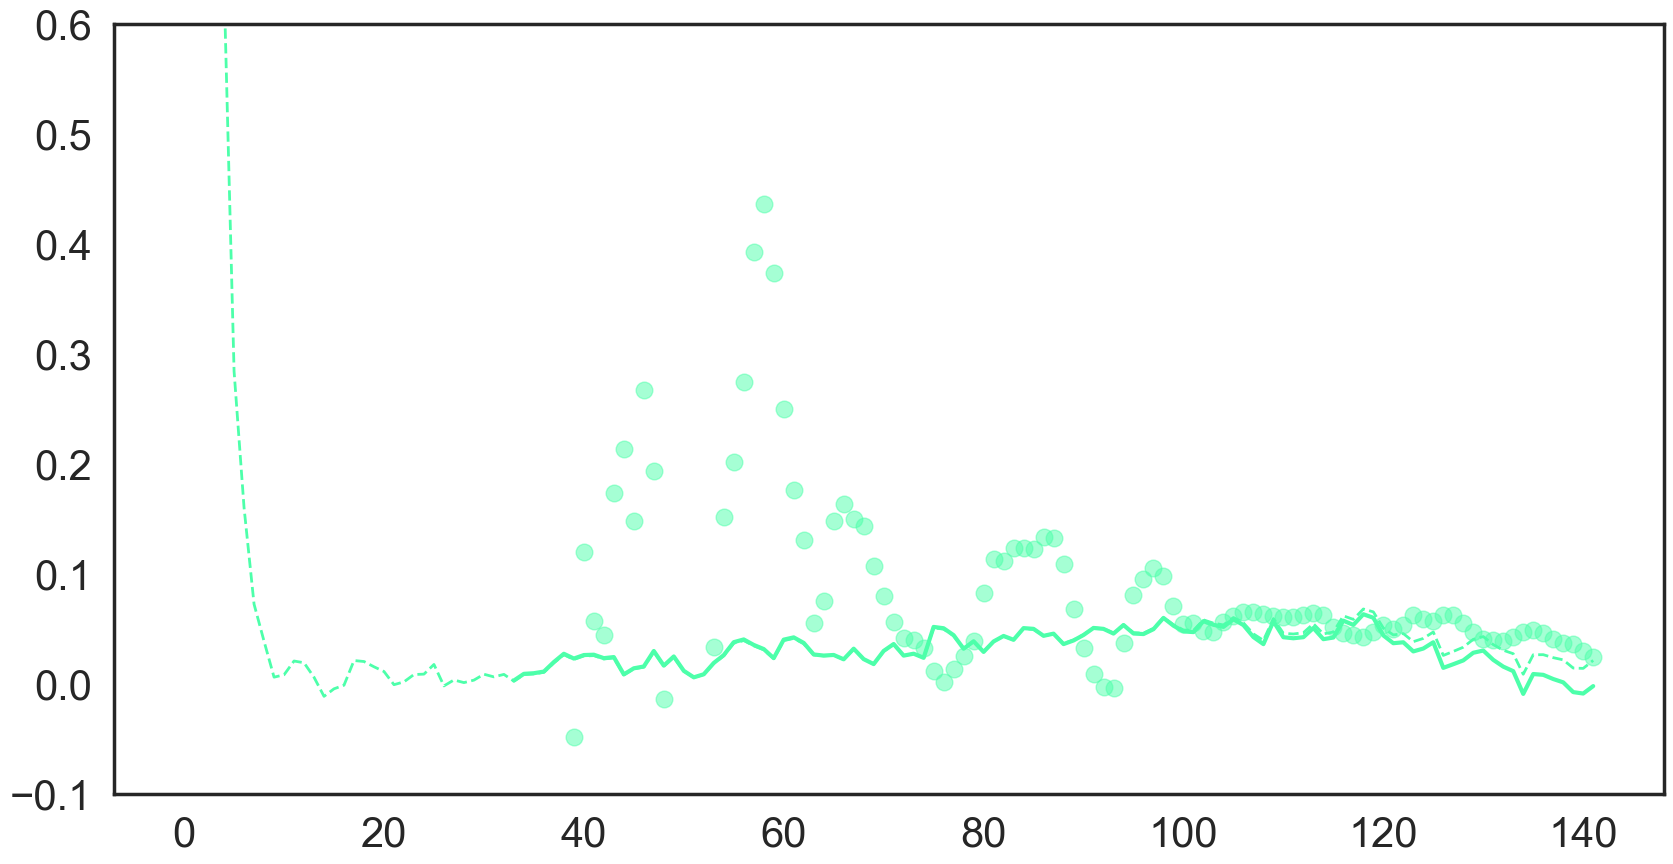

: 

In [ ]:
yc=  M_success.yc
ts_root = np.array(M_success.root_strain.times)
root = M_success.root_strain
fig,ax = plt.subplots(1, 1, figsize=(20, 10), sharex=True)
for x in M_success.strain_set:
    y = np.array(x.infected_history)/N
    try:
        if np.max(y)<1e-4:
            continue
    except:
        continue
    if x.name==0:
        continue
    else:
        color = color_ds[x.distance_to_parent]
    c = np.exp(-x.distance_to_parent/xi)
    ax.plot(x.times, x.fitness_history, color=color, alpha=1)
    
    ax.plot(root.times, root.fitness_history + (1-c)*( yc*(ts_root-6))* (1 /(1- yc*(ts_root-6)))
            , color=color,ls='--', lw=2)
    #gaussian smoothing
    logder = np.gradient(np.log(
        pd.Series(x.infected_history).rolling(5, win_type='gaussian').mean(std=5).values), x.times)
        
    ax.plot(x.times, logder, 'o',color=color, alpha=.5)
        
    print(x.parent.name)
    
# ax.plot(ts_root, M_success.yc * ts_root**(2/3), color='grey', lw=3, ls='--')
ax.set_ylim(-.1,.6)
# ax.set_xlim(0, 60)

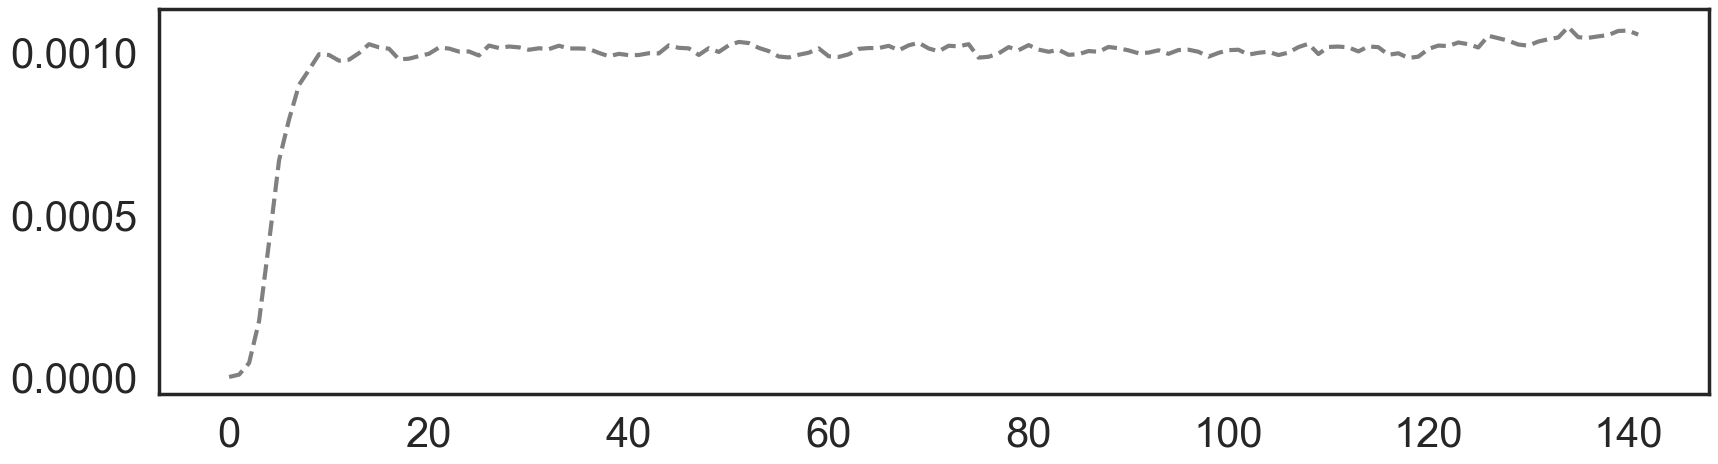

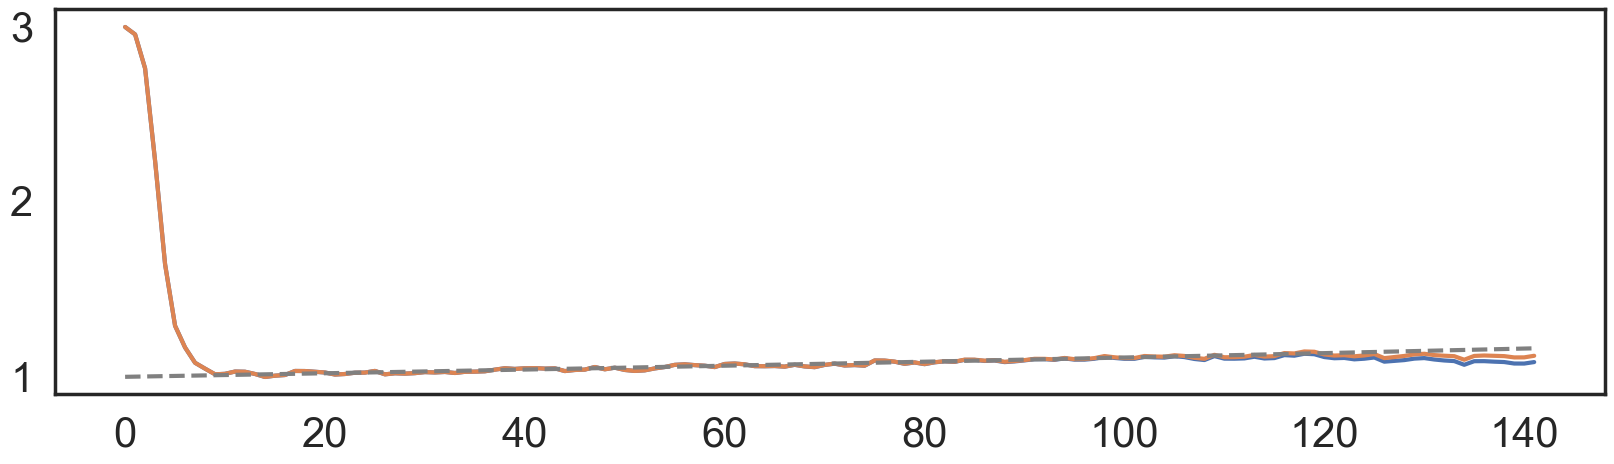

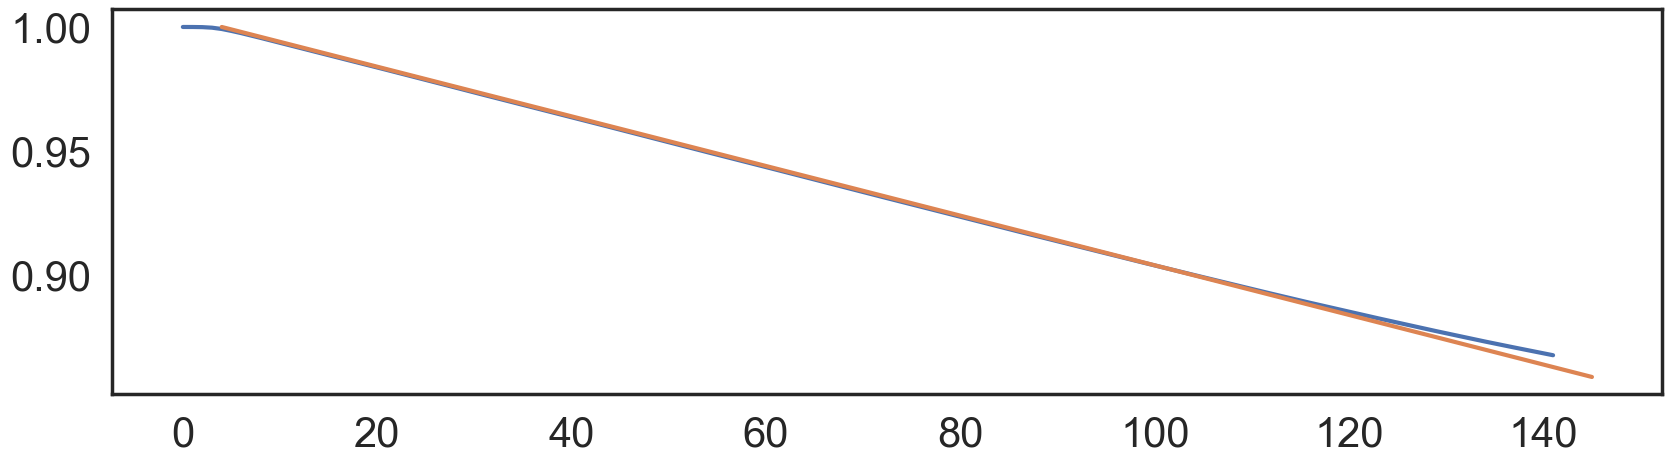

In [226]:
yc=  M_success.yc
ts_root = np.array(M_success.root_strain.times)
zs_root = np.array(M_success.root_strain.recovered_history)/N
fig,ax = plt.subplots(1, 1, figsize=(20, 5), sharex=True)
ax.plot(ts_root, M_success.ytot_history, color='grey', lw=3, ls='--')

ytot_history = np.array(M_success.ytot_history)
x_avg_history = np.array(M_success.x_avg_history)

x_root_history = np.array(M_success.root_strain.susceptible_history)/N

fig,ax= plt.subplots(1, 1, figsize=(20, 5), sharex=True)
ax.plot(ts_root, R0*fractional_fun_modified(ytot_history, x_avg_history, M_success.yc, R0))
ax.plot(ts_root, R0*fractional_fun_modified(ytot_history, x_root_history, M_success.yc, R0))
# ax.axhline(1)
# ax.plot(ts_root, 4*(yc*ts_root)**2)
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.plot(ts_root, 1/(1-yc*(ts_root-4)), color='grey', lw=3, ls='--')

fig,ax= plt.subplots(1, 1, figsize=(20, 5), sharex=True)
ax.plot(ts_root, x_root_history)
ax.plot(ts_root+4, 1- yc*ts_root)

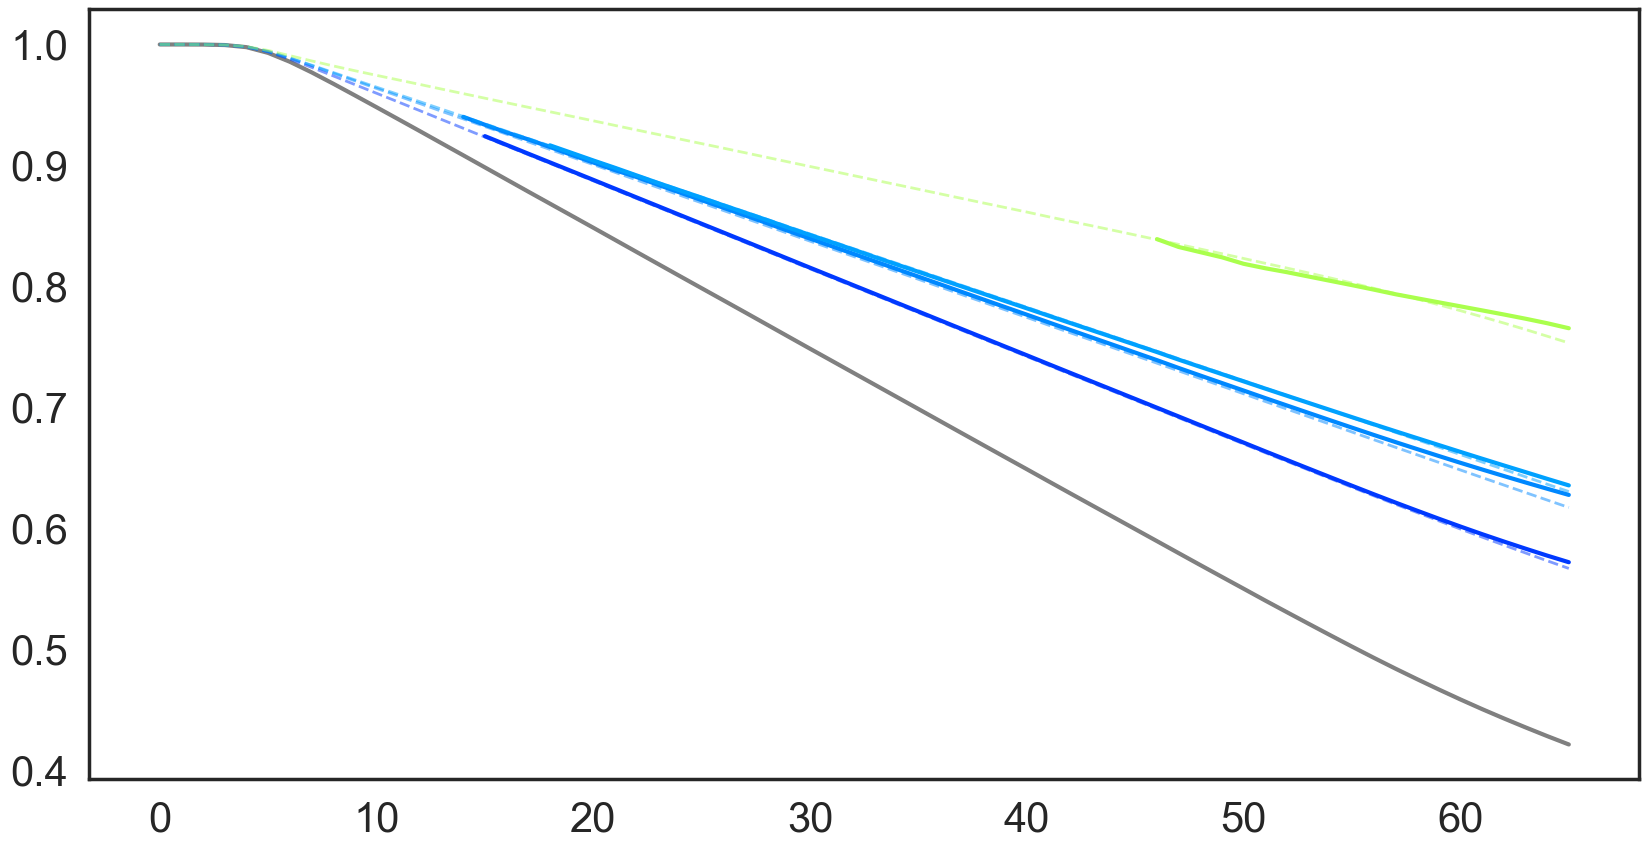

In [114]:
root = M_success.root_strain
fig,ax = plt.subplots(1, 1, figsize=(20, 10), sharex=True)
for x in M_success.strain_set:
    y = np.array(x.infected_history)/N
    try:
        if np.max(y)<1e-3:
            continue
    except:
        continue
    if x.name==0:
        color = 'grey'
    # if x.name in big_names:
    #     color = 'grey'
    # else:
    else:
        color = color_ds[x.distance_to_root]
    c = np.exp(-x.distance_to_parent/xi)
    ax.plot(x.times,np.array(x.susceptible_history)/N, color=color, alpha=1)

    x_theo = np.array(root.susceptible_history)/N + (1-c)*np.array(root.recovered_history)/N
    ax.plot(root.times, x_theo, color=color,ls='--', lw=2,alpha=.5)
    

In [17]:
strains_with_history = [strain for strain in M_success.strain_set if len(strain.infected_history)>0]
len([x for x in strains_with_history if np.max(x.infected_history)>10/np.max(x.fitness_history)])

40

done


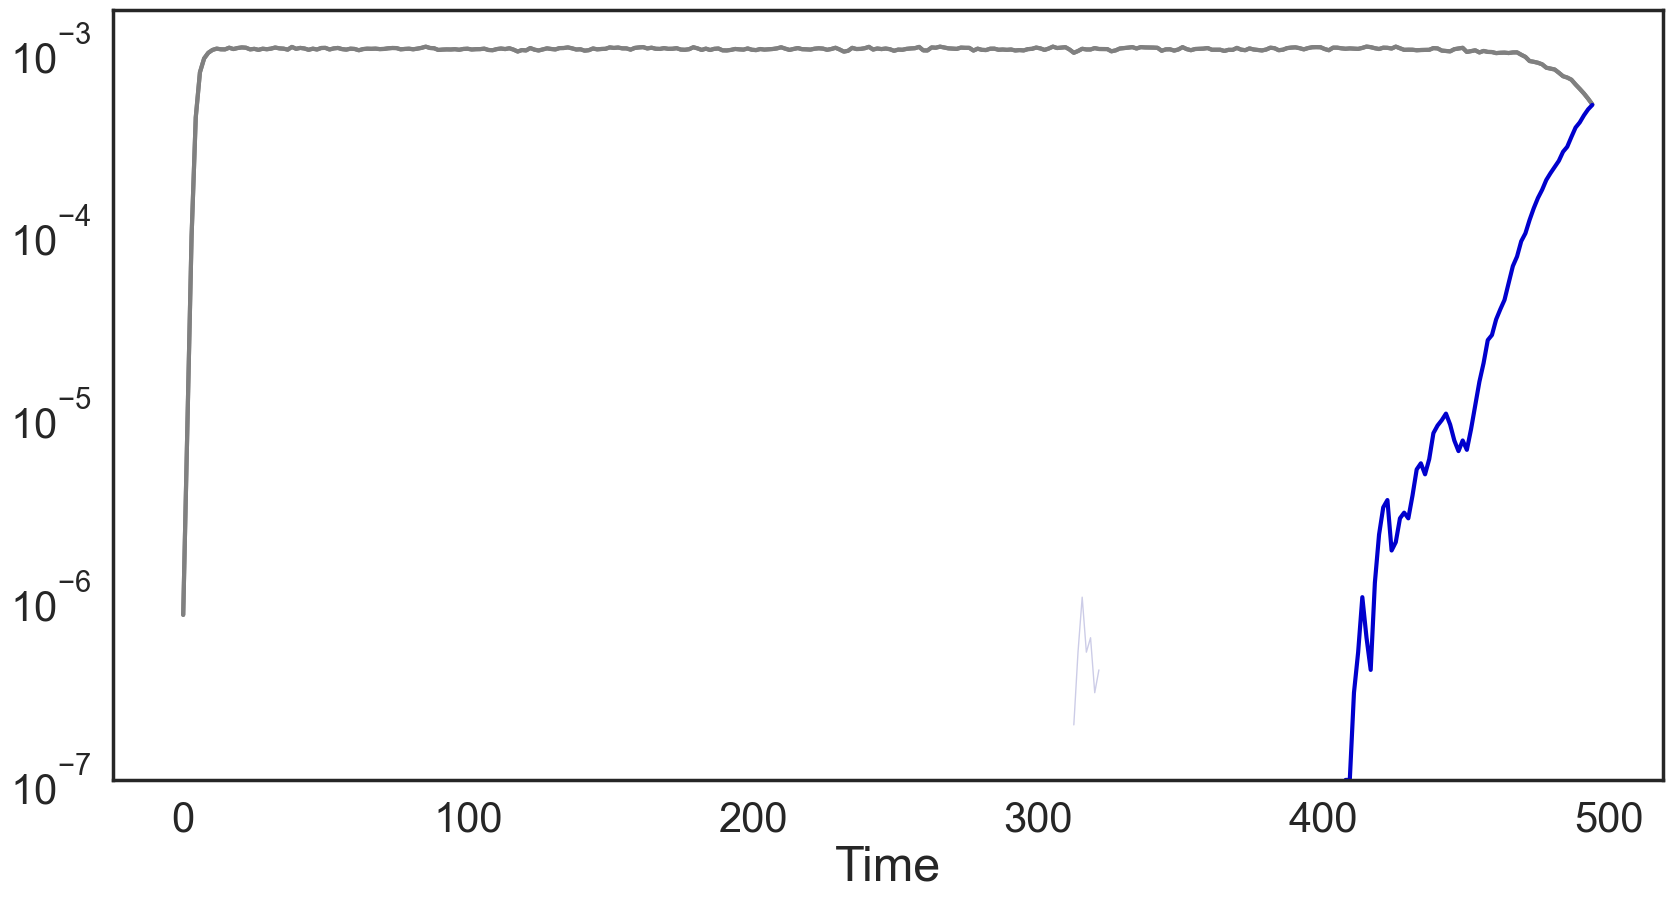

In [18]:
%autoreload
M_ext = eqModel(N=N, infection_rate=beta, yc = 1e-3, recovery_rate=1, mutation_rate = mu/500, p_alpha= p_alpha,xi = xi, initial_infected=10,dt=None, figures_folder= None)
M_ext.run_to_extinction()#(ignore_running= True,max_iter = 6000)
print('done')

ds = np.arange(0,20 + np.round(np.log(mu*N)/p_alpha))
color_ds= dict(zip(ds,plt.cm.jet(np.linspace(0,1,len(ds)))))

fig,ax =plt.subplots(1,1,figsize=(20,10),sharex=True)
ax = [ax]
plt.subplots_adjust(hspace=.1,wspace=.3)
y0p = (R0-1-np.log(R0))/R0

xinf = M_ext.find_x_inf(R0,M_ext.yc)
T = M_ext.calc_T(R0,M_ext.yc,N)
zinf = 1-xinf
ts_det = np.linspace(0,T,1000)

#get the three strains with the highest infected size
big_strains = sorted(M_ext.strain_set, key=lambda x: x.recovered_size, reverse=True)[:5]
big_names=  [strain.name for strain in big_strains]

if True:
    ts_root= np.array(M_ext.root_strain.times)
    I_root = np.array(M_ext.root_strain.infected_history)
    S_root = np.array(M_ext.root_strain.susceptible_history)
    R_root = np.array(M_ext.root_strain.recovered_history)
    xparent = S_root/N
    zparent = R_root/N
    yparent = I_root/N
    t_peak = ts_root[np.argmax(I_root)]
    legend_ds = {}

for strain in M_ext.strain_set:
    if strain.name==0:
        color='grey'
    else:
        color = color_ds[strain.distance_to_parent]

    I_i = np.array(strain.infected_history)
    if len(I_i)==0:
        continue

    c= np.exp(-strain.distance_to_parent/xi)
    s_inf = R0*(1-xinf)*(1-c)
    

    chi_i = np.array(strain.frequency_history)
    s_i = np.array(strain.selection_history)
    ts_i = np.array(strain.times)
    d_pc = strain.distance_to_parent
    
    if strain.root_intersection_time<np.inf or strain.name==0:
        
        # #ax[1].axhline(s_inf,color=color,ls='--')
        t_i0 = ts_i[0]
        chi_0 = chi_i[0]
        if t_i0<t_peak:
            t_i0 = t_peak

            # ax[0].axvline(ts_i[np.argmin(np.abs(ts_i-t_peak))],color=color,ls='--')
        
        # ax[0].axhline(chi_0,color=color,ls='--')
        # ax[0].plot(ts_i, chi_0*np.exp(s_inf*(ts_i-t_i0)),color=color,ls=':')
        alpha= 1
        lw= 3
        # #ax[1].plot(ts_root, R0/(1+ M_ext.yc*yparent)*(1-c)*zparent,color=color, alpha= alpha, lw = lw, linestyle=':')
        #ax[1].plot(ts_root, (1-c)*zparent,color=color, alpha= alpha, lw = lw, linestyle='--')
        #ax[1].plot(ts_root, (1-c)*zparent/(1-zparent),color=color, alpha= alpha, lw = lw, linestyle='-.')
        # #ax[1].plot(ts)

    else: 
        alpha = .2
        lw= 1
    if strain.name ==0:
        ax[0].plot(ts_i[chi_i>0],I_i[chi_i>0]/N,color=color, alpha= alpha, lw = lw)
    ax[0].plot(ts_i[chi_i>0],I_i[chi_i>0]/N,color=color, alpha= alpha, lw = lw)
    #ax[1].plot(ts_i,s_i ,color=color, alpha= alpha, lw = lw)    


for a in ax:
    a.set_xlabel('Time')
    
ax[0].set_yscale('log')


approx_handles = [mpl.lines.Line2D([0], [0], color='grey', lw=3, linestyle='--'), mpl.lines.Line2D([0], [0], color='grey', lw=3, linestyle='-.')]
approx_labels = [r'$\left(1-c(d)\right) z(t)$',r'$\left(1-c(d)\right) \frac{z(t)}{1-z(t)}$']

ax[0].set_ylim(bottom=1/N)
cmap = plt.cm.jet  # define the colormap
cmaplist = [cmap(i) for i in range(cmap.N)]
cmaplist[0] = (.5, .5, .5, 1.0)
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
bounds = ds*p_alpha

In [19]:
M_ext.n_contenders_for_intersection, M_success.n_contenders_for_intersection

(2, 7)

In [20]:
M_ext.t_intersection, M_success.t_intersection

(494.5853591131326, 57.1)

In [21]:
%autoreload
N = 1e7
R0=beta=3
mu= 1e-4
p_alpha = .1
kappa=0
xi = 50

M_controlled = eqModel(N=N, infection_rate=beta, yc = 1e-3, recovery_rate=1, mutation_rate = mu, p_alpha= p_alpha,xi = xi, initial_infected=10,dt=None, figures_folder= None,)
M_controlled.run_to_extinction(progress_bar= True, snapshot_interval=1)#(ignore_running= True,max_iter = 6000)
print('done')

  2%|▏         | 1261/73315 [00:02<02:04, 578.49it/s]

done


In [22]:
M_controlled.mutation_rate*N

1000.0

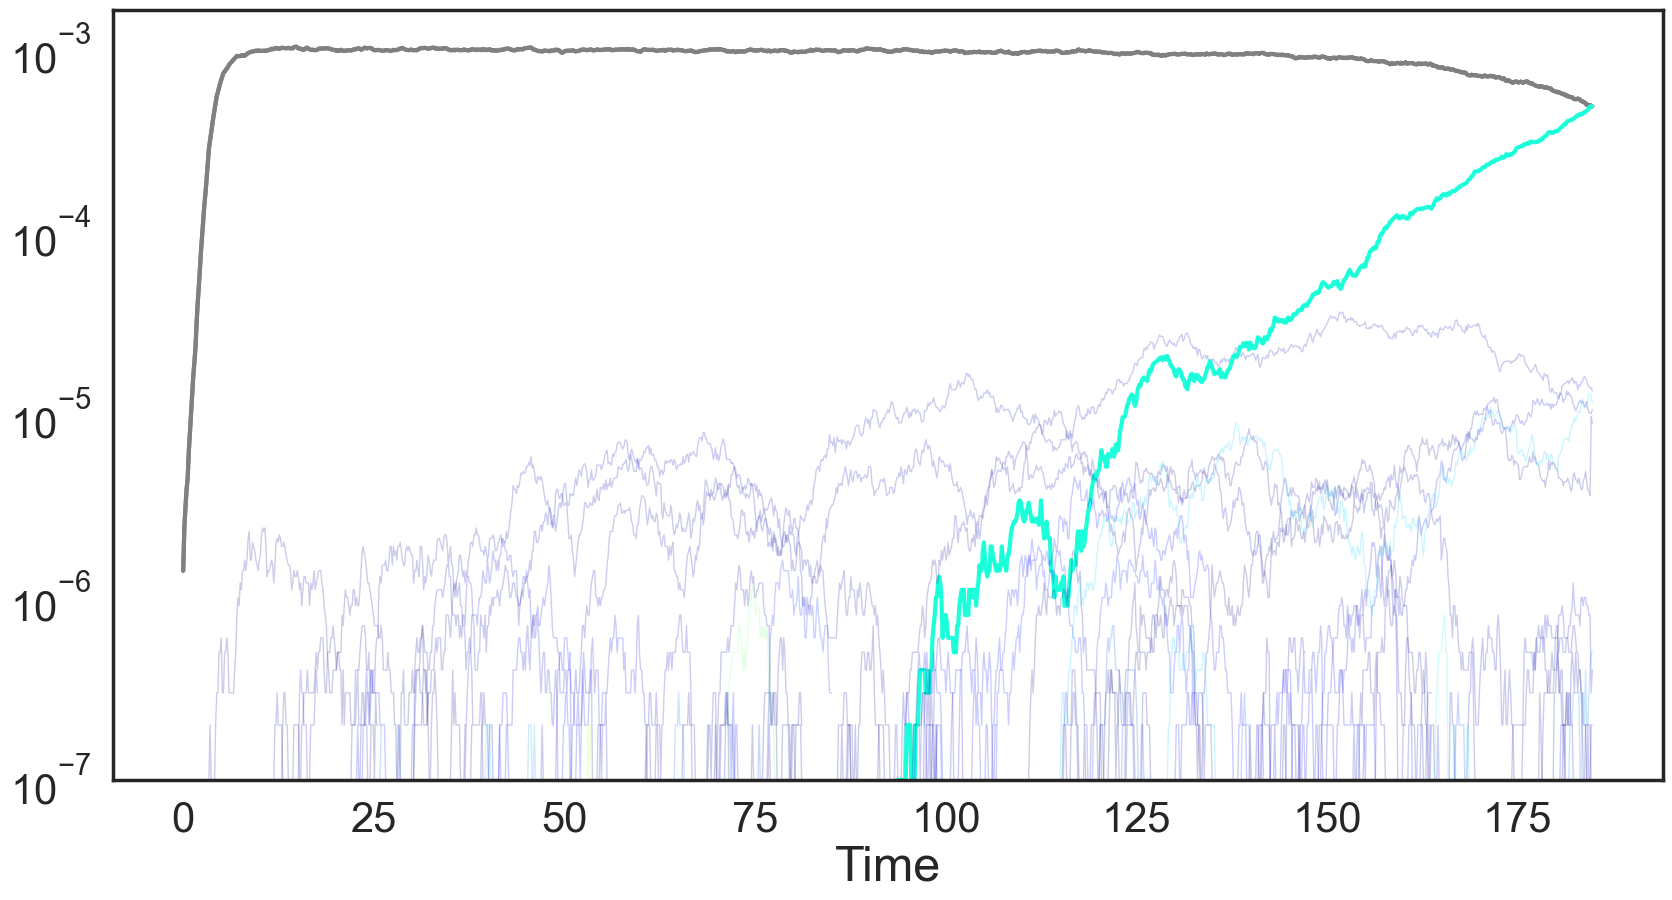

In [23]:

ds = np.arange(0,20 + np.round(np.log(mu*N)/p_alpha))
color_ds= dict(zip(ds,plt.cm.jet(np.linspace(0,1,len(ds)))))

fig,ax =plt.subplots(1,1,figsize=(20,10),sharex=True)
ax = [ax]
plt.subplots_adjust(hspace=.1,wspace=.3)
y0p = (R0-1-np.log(R0))/R0

xinf = M_controlled.find_x_inf(R0,M_controlled.yc)
T = M_controlled.calc_T(R0,M_controlled.yc,N)
zinf = 1-xinf
ts_det = np.linspace(0,T,1000)

#get the three strains with the highest infected size
big_strains = sorted(M_controlled.strain_set, key=lambda x: x.recovered_size, reverse=True)[:5]
big_names=  [strain.name for strain in big_strains]

if True:
    ts_root= np.array(M_controlled.root_strain.times)
    I_root = np.array(M_controlled.root_strain.infected_history)
    S_root = np.array(M_controlled.root_strain.susceptible_history)
    R_root = np.array(M_controlled.root_strain.recovered_history)
    xparent = S_root/N
    zparent = R_root/N
    yparent = I_root/N
    t_peak = ts_root[np.argmax(I_root)]
    legend_ds = {}

for strain in M_controlled.strain_set:
    if strain.name==0:
        color='grey'
    else:
        color = color_ds[strain.distance_to_parent]

    I_i = np.array(strain.infected_history)
    if len(I_i)==0:
        continue

    c= np.exp(-strain.distance_to_parent/xi)
    s_inf = R0*(1-xinf)*(1-c)
    

    chi_i = np.array(strain.frequency_history)
    s_i = np.array(strain.selection_history)
    ts_i = np.array(strain.times)
    d_pc = strain.distance_to_parent
    
    if strain.root_intersection_time<np.inf or strain.name==0:
        
        # #ax[1].axhline(s_inf,color=color,ls='--')
        t_i0 = ts_i[0]
        chi_0 = chi_i[0]
        if t_i0<t_peak:
            t_i0 = t_peak

            # ax[0].axvline(ts_i[np.argmin(np.abs(ts_i-t_peak))],color=color,ls='--')
        
        # ax[0].axhline(chi_0,color=color,ls='--')
        # ax[0].plot(ts_i, chi_0*np.exp(s_inf*(ts_i-t_i0)),color=color,ls=':')
        alpha= 1
        lw= 3
        # #ax[1].plot(ts_root, R0/(1+ M_controlled.yc*yparent)*(1-c)*zparent,color=color, alpha= alpha, lw = lw, linestyle=':')
        #ax[1].plot(ts_root, (1-c)*zparent,color=color, alpha= alpha, lw = lw, linestyle='--')
        #ax[1].plot(ts_root, (1-c)*zparent/(1-zparent),color=color, alpha= alpha, lw = lw, linestyle='-.')
        # #ax[1].plot(ts)

    else: 
        alpha = .2
        lw= 1
    if strain.name ==0:
        ax[0].plot(ts_i[chi_i>0],I_i[chi_i>0]/N,color=color, alpha= alpha, lw = lw)
    ax[0].plot(ts_i[chi_i>0],I_i[chi_i>0]/N,color=color, alpha= alpha, lw = lw)
    #ax[1].plot(ts_i,s_i ,color=color, alpha= alpha, lw = lw)    


for a in ax:
    a.set_xlabel('Time')
    
ax[0].set_yscale('log')


approx_handles = [mpl.lines.Line2D([0], [0], color='grey', lw=3, linestyle='--'), mpl.lines.Line2D([0], [0], color='grey', lw=3, linestyle='-.')]
approx_labels = [r'$\left(1-c(d)\right) z(t)$',r'$\left(1-c(d)\right) \frac{z(t)}{1-z(t)}$']

ax[0].set_ylim(bottom=1/N)
cmap = plt.cm.jet  # define the colormap
cmaplist = [cmap(i) for i in range(cmap.N)]
cmaplist[0] = (.5, .5, .5, 1.0)
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
bounds = ds*p_alpha

NameError: name 'root' is not defined

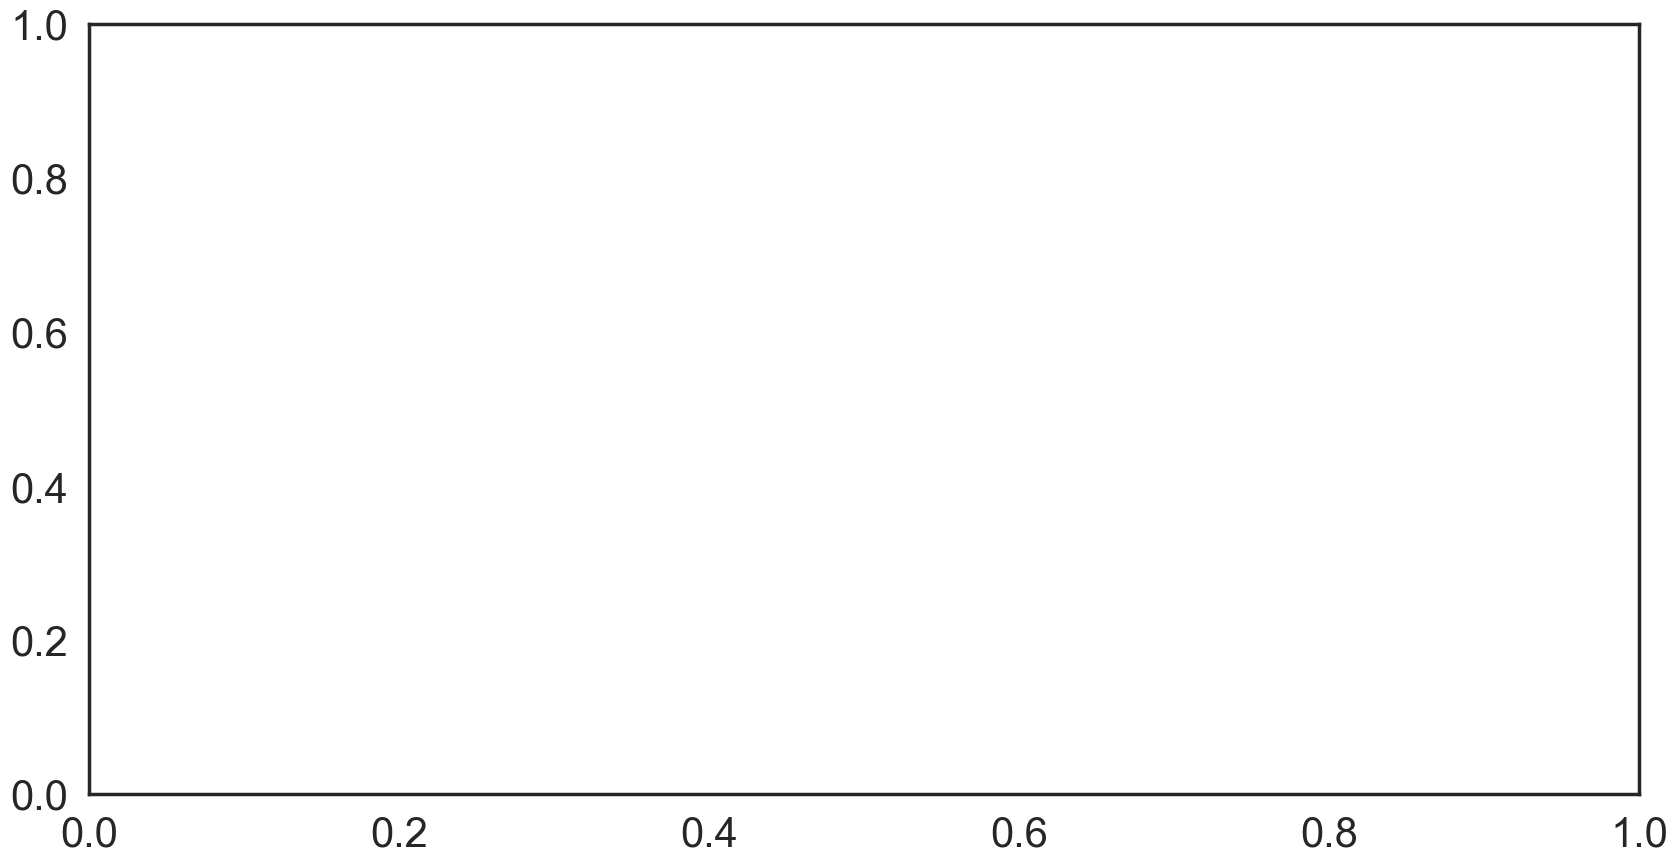

In [24]:
fig,ax = plt.subplots(1,1,figsize=(20,10),sharex=True)
ax.plot(root.times,
            theo_fit, c = l.get_color()
            )

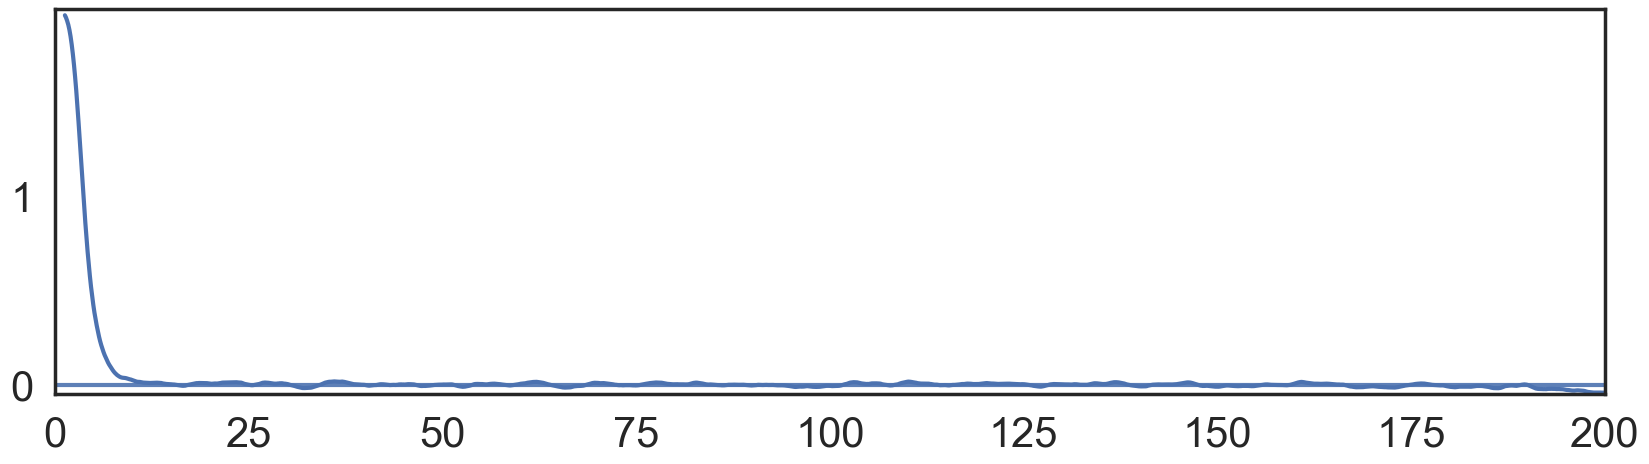

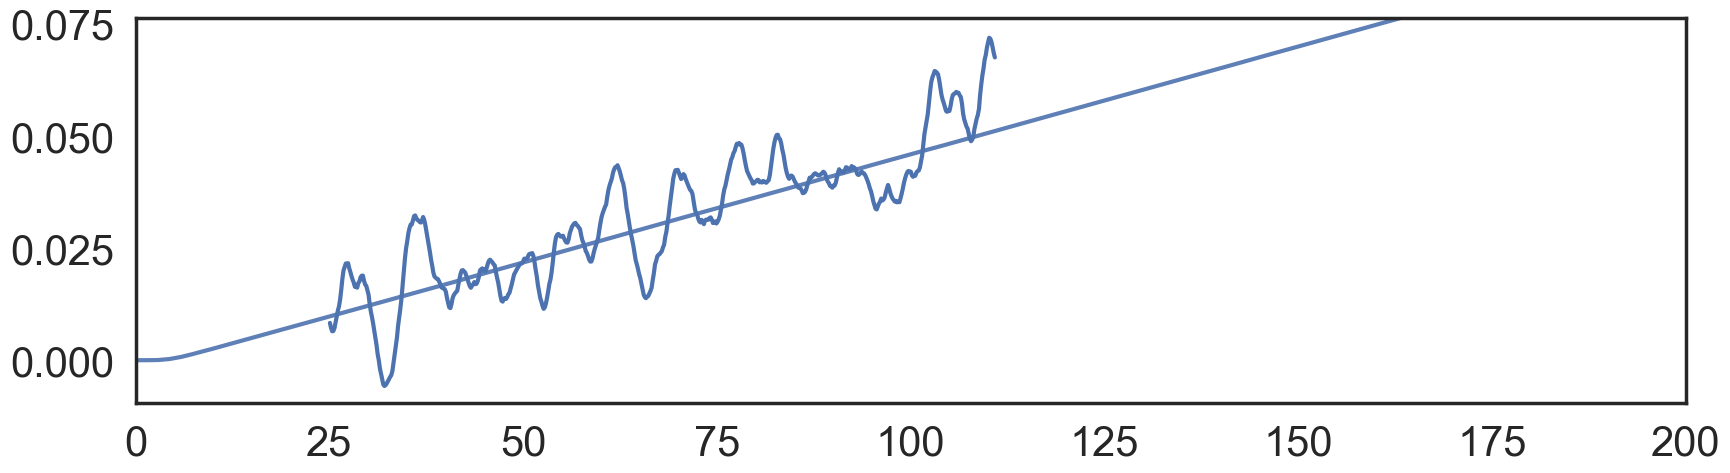

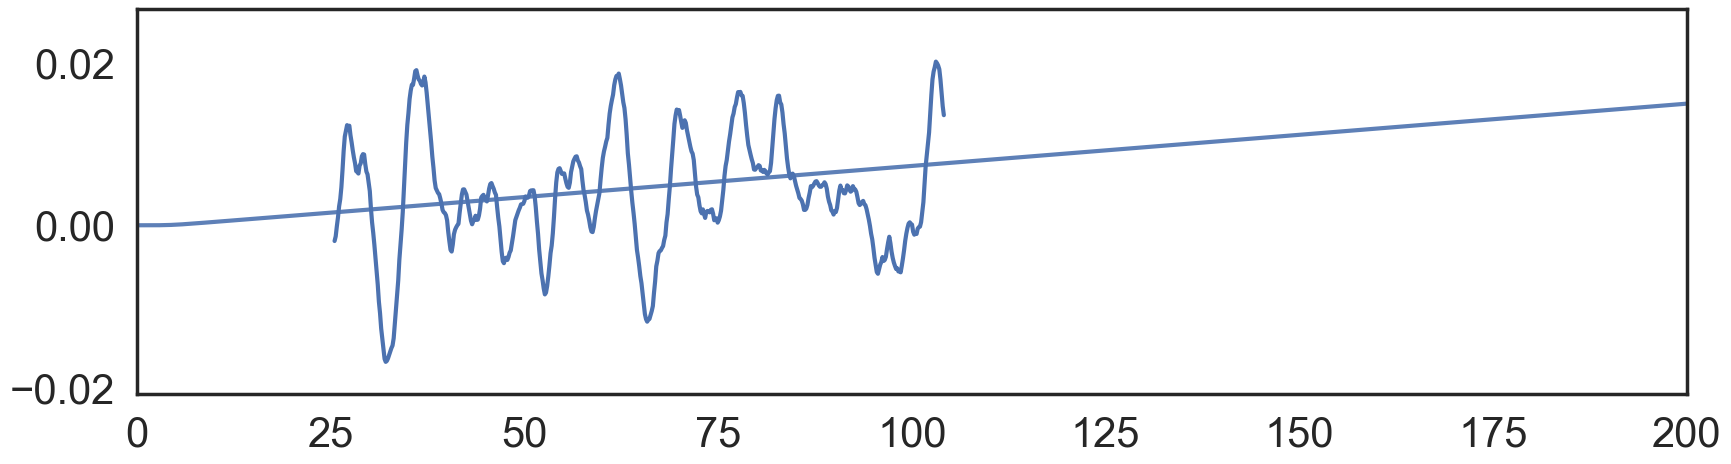

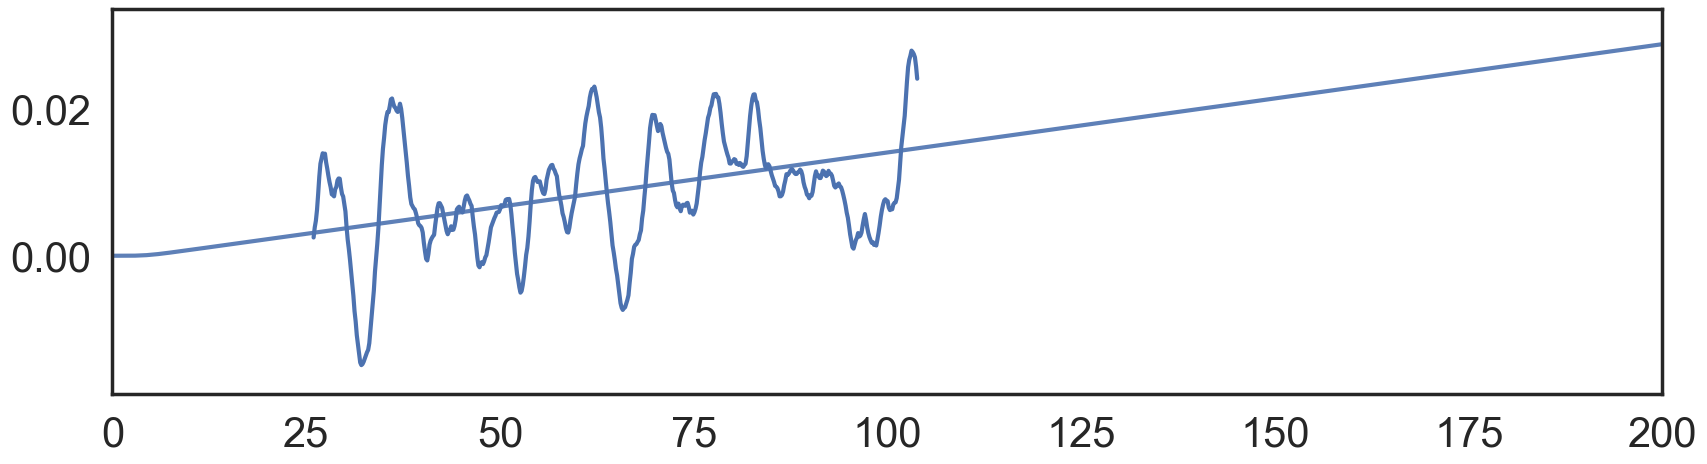

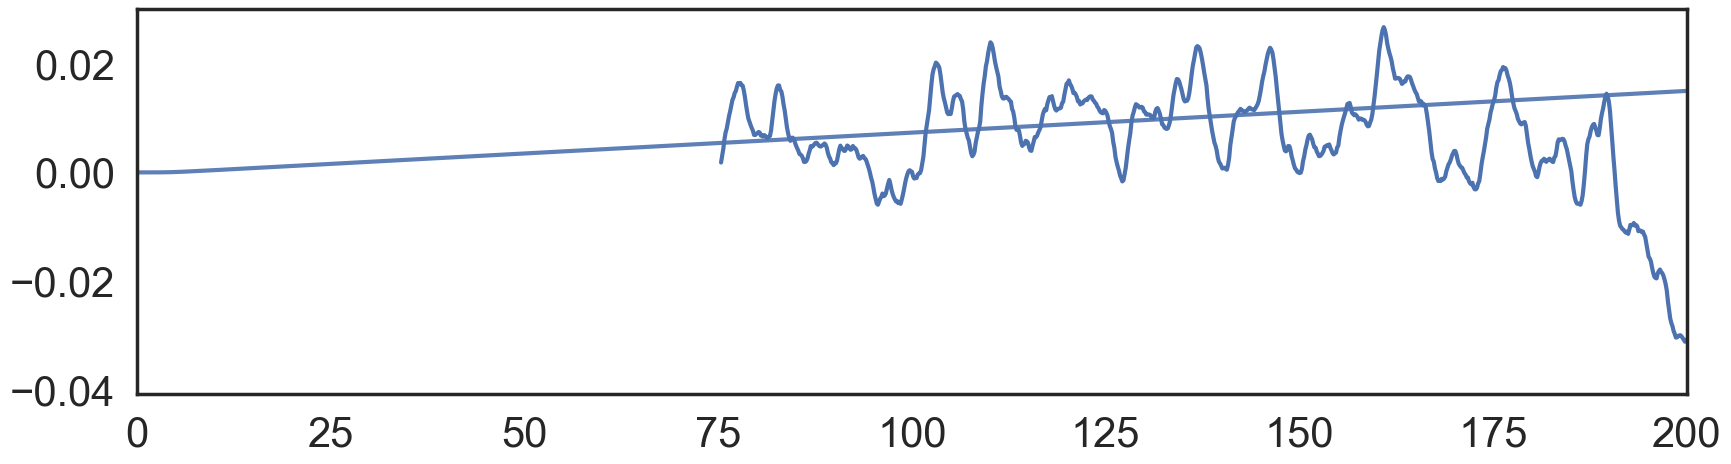

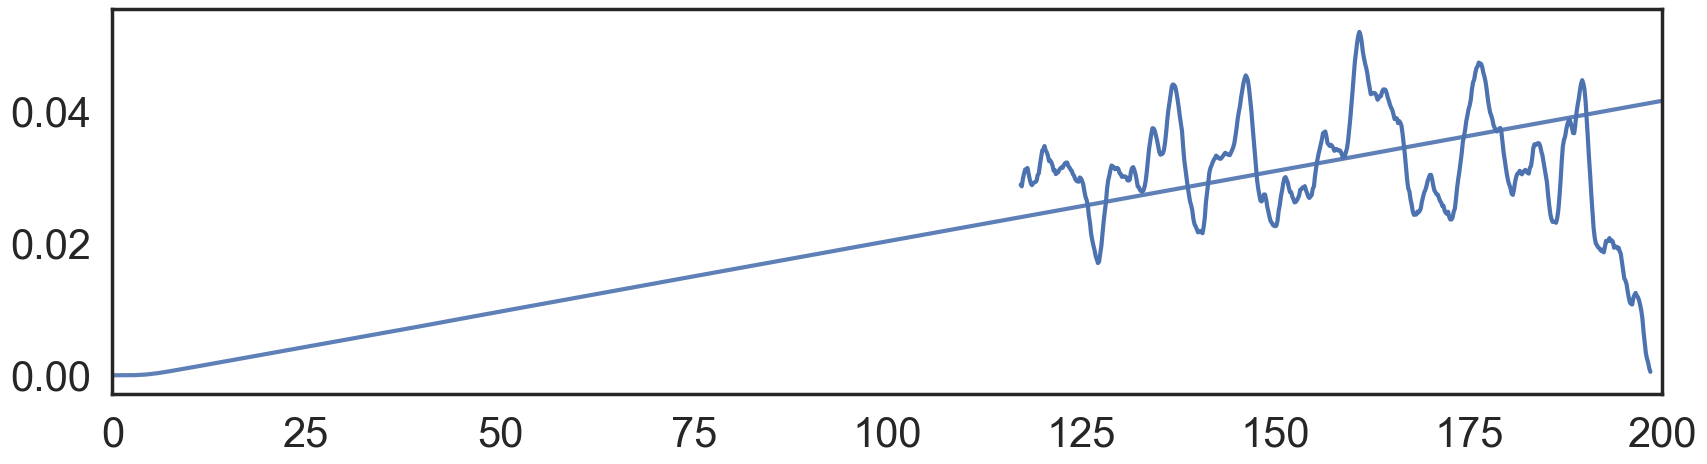

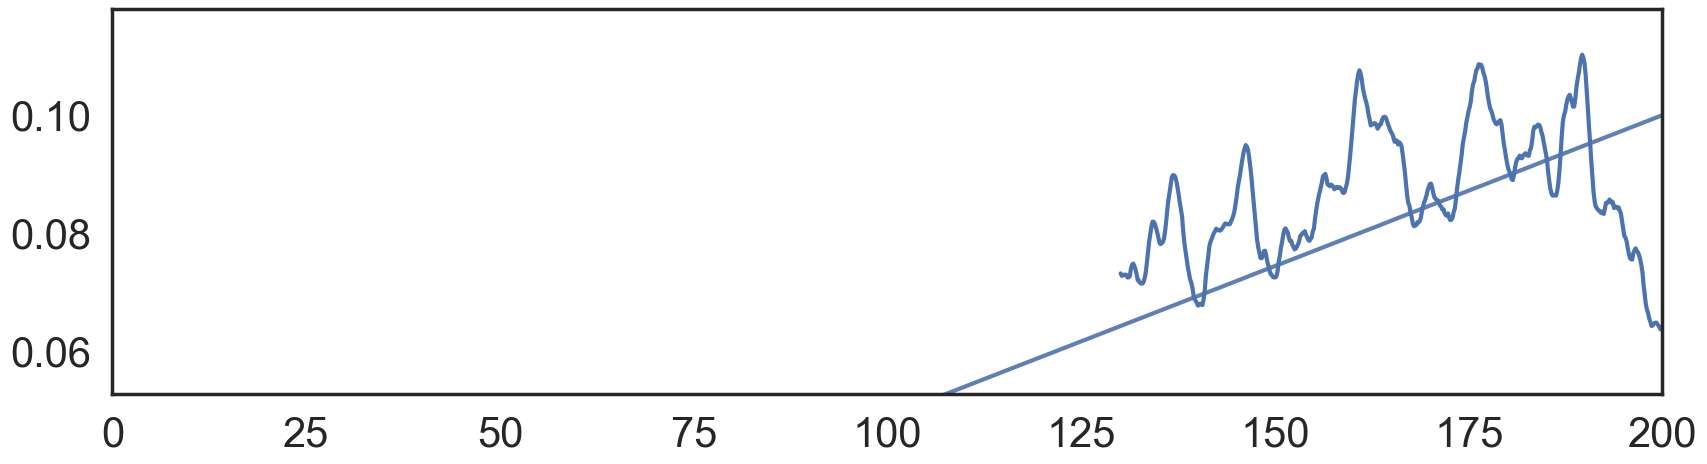

In [ ]:
root = M_controlled.root_strain
for x in strains_with_history:
        if len(x.fitness_history)>500:
                fig,ax = plt.subplots(1,1,figsize=(20,5),sharex=True)
                l, = ax.plot(x.times,
                pd.Series(x.fitness_history).rolling(10).mean(),
                label=x.name)
                theo_fit = (1-np.exp(-x.distance_to_parent/xi))*np.array(root.recovered_history)/N
                ax.plot(root.times,
                theo_fit, c = l.get_color(), alpha= .9
                )
                ax.set_ylim(np.min(x.fitness_history),np.max(x.fitness_history))
                ax.set_xlim(0, 200)

13.651323336621655
13.66


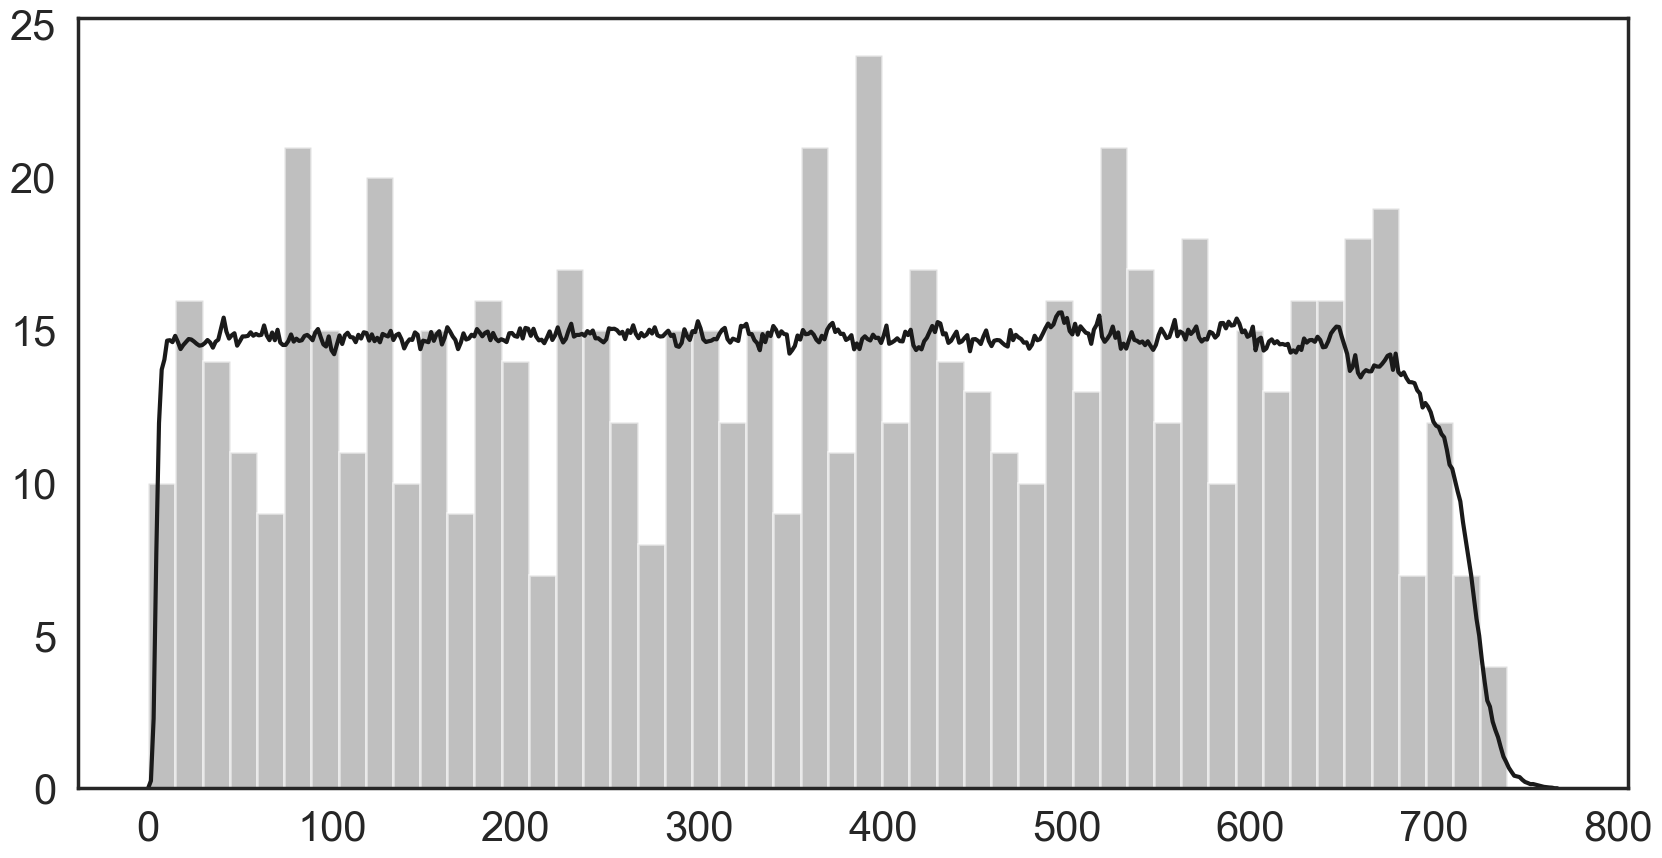

In [ ]:
fig,ax =plt.subplots(1,1,figsize=(20,10),sharex=True)
birth_times = [x.birth_time for x in M_controlled.strain_set]

h,b,p = ax.hist(birth_times, bins=50, color='grey', alpha=.5)
db = b[1]-b[0]

ax.plot(M_controlled.root_strain.times, np.array(M_controlled.root_strain.infected_history)*M_controlled.mutation_rate*db, color='k', alpha=1)

print(np.average(np.array(M_controlled.root_strain.infected_history)*M_controlled.mutation_rate*db))
print(np.average(h))

In [ ]:
M_success = eqModel(N=N, infection_rate=beta, yc = 1e-2, recovery_rate=1, mutation_rate = mu, p_alpha= p_alpha,xi = xi, initial_infected=10,dt=.1, figures_folder= None, seed = 101)
M_success.run_to_extinction(snapshot_interval=10)#(ignore_running= True,max_iter = 6000)


# conditioned_strains = [x for x in M_success.strain_set if len(x.times)>0]
intersecting_strain = [x for x in M_success.strain_set if x.root_intersection_time < np.inf][0]
t_intersection = intersecting_strain.root_intersection_time
d_intersection = intersecting_strain.distance_to_root
n_contenders_for_intersection = M_success.n_contenders_for_intersection
outcome = "extinct" if M_success.t_intersection == np.inf else "success"

print(f"Intersecting strain: {intersecting_strain.name}")
print(f"Time of intersection: {t_intersection}")
print(f"Distance to root: {d_intersection}")
print(f"Number of contenders for intersection: {n_contenders_for_intersection}")
print(f"Outcome: {outcome}")

Intersecting strain: 207
Time of intersection: 58.5
Distance to root: 39.0
Number of contenders for intersection: 4
Outcome: success


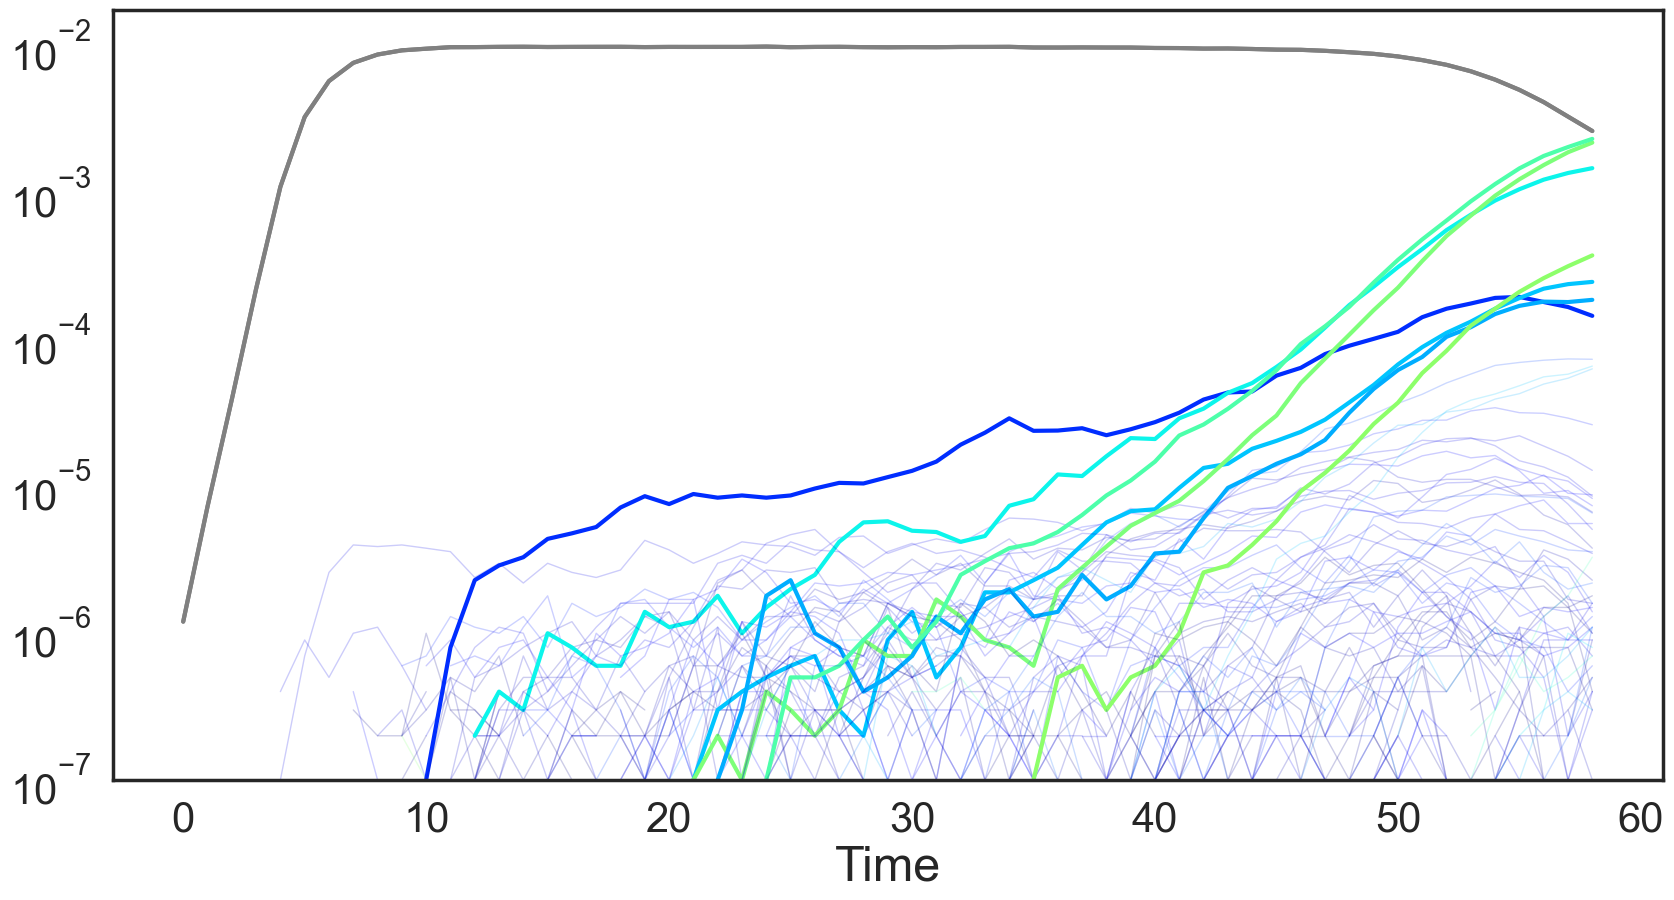

In [ ]:
%autoreload
ds = np.arange(0,20 + np.round(np.log(mu*N)/p_alpha))
color_ds= dict(zip(ds,plt.cm.jet(np.linspace(0,1,len(ds)))))

fig,ax =plt.subplots(1,1,figsize=(20,10),sharex=True)
ax = [ax]
plt.subplots_adjust(hspace=.1,wspace=.3)
y0p = (R0-1-np.log(R0))/R0

xinf = M_success.find_x_inf(R0,M_success.yc)
T = M_success.calc_T(R0,M_success.yc,N)
zinf = 1-xinf
ts_det = np.linspace(0,T,1000)

#get the three strains with the highest infected size
big_strains = sorted(M_success.strain_set, key=lambda x: x.recovered_size, reverse=True)[:5]
big_names=  [strain.name for strain in big_strains]

if True:
    ts_root= np.array(M_success.root_strain.times)
    I_root = np.array(M_success.root_strain.infected_history)
    S_root = np.array(M_success.root_strain.susceptible_history)
    R_root = np.array(M_success.root_strain.recovered_history)
    xparent = S_root/N
    zparent = R_root/N
    yparent = I_root/N
    t_peak = ts_root[np.argmax(I_root)]
    legend_ds = {}

for strain in M_success.strain_set:
    if strain.name==0:
        color='grey'
    else:
        color = color_ds[strain.distance_to_parent]

    I_i = np.array(strain.infected_history)
    if len(I_i)==0:
        continue

    c= np.exp(-strain.distance_to_parent/xi)
    s_inf = R0*(1-xinf)*(1-c)
    

    chi_i = np.array(strain.frequency_history)
    s_i = np.array(strain.selection_history)
    ts_i = np.array(strain.times)
    d_pc = strain.distance_to_parent
    
    if strain.root_intersection_time<np.inf or strain.name==0:

        t_i0 = ts_i[0]
        chi_0 = chi_i[0]
        if t_i0<t_peak:
            t_i0 = t_peak

            # ax[0].axvline(ts_i[np.argmin(np.abs(ts_i-t_peak))],color=color,ls='--')

        alpha= 1
        lw= 3


    else: 
        alpha = .2
        lw= 1
        # if np.max(strain.infected_history)>100/np.max(strain.fitness_history):
        if np.max(strain.frequency_history)>1e-2:
            alpha = 1
            lw= 3
    if strain.name ==0:
        ax[0].plot(ts_i[chi_i>0],I_i[chi_i>0]/N,color=color, alpha= alpha, lw = lw)
    ax[0].plot(ts_i[chi_i>0],I_i[chi_i>0]/N,color=color, alpha= alpha, lw = lw)
    #ax[1].plot(ts_i,s_i ,color=color, alpha= alpha, lw = lw)    


for a in ax:
    a.set_xlabel('Time')
    
ax[0].set_yscale('log')


approx_handles = [mpl.lines.Line2D([0], [0], color='grey', lw=3, linestyle='--'), mpl.lines.Line2D([0], [0], color='grey', lw=3, linestyle='-.')]
approx_labels = [r'$\left(1-c(d)\right) z(t)$',r'$\left(1-c(d)\right) \frac{z(t)}{1-z(t)}$']

ax[0].set_ylim(bottom=1/N)
cmap = plt.cm.jet  # define the colormap
cmaplist = [cmap(i) for i in range(cmap.N)]
cmaplist[0] = (.5, .5, .5, 1.0)
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
bounds = ds*p_alpha